### Census Data

Consider the following questions: 
- Who is my customer? 
- Where should I relocate my plant or headquarters, given the skill set I require of workers? 
- Where would be a good location for a new store, given my knowledge of my customer? 

**How would you answer these questions?** This lecture illustrate one set of tools to answer these questions: Get detailed demographic information about the people that live in a given area using the US census.

What is the [US census](https://en.wikipedia.org/wiki/United_States_Census)? Every 10 years the US government is required to essentially count all people within the United States and in doing so constructs detailed demographic information about the peopel living and working within fine geographic levels. 

A new innovation that is of interest to us is the [American Community Survey](https://en.wikipedia.org/wiki/American_Community_Survey). This is a Survey (not a census), but it asks the long-form questions whose answers can then be matched up with the 10 year census in a way to provide information at a **yearly** frequency. So you can find out median household income in zip code 90210 for 2015, 2014, etc. actually only going back to 2010 since this is a new development.

A second development is that the US census has a well developed API for which we can directly access the data. In the past, this process would look like this: bulk download `.csv` files, pull what you need, store it, etc. Now on the fly you can get what you want directly (and I think the main user of this are commercial vendors, e.g. like you look at Zillow and some characteristics of that zip code are reported, this is a direct feed from the census). 

**What are we going to do with it?** We will learn how to use the Census API and then use information to ask who voted for Trump or Clinton in the 2016 Presidential election. This is a nice application because, we know election results at very fine levels of geography, but we will never know individual votes. But we can `merge` the election results up with demographic information at those fine geographic locations and be able to make statements like "areas with a less educated population were more likely to vote for candidate X" Along the way, we will learn some more stuff:
- Census API
- More practice `merge`ing
- Pivot Tables

Then this will fit with the next two lectures:
- Statistics in python `statsmodels.api`
- Mapping 

#### Getting Started

So below are the packages that we need. The first two we know. The `Census` package is the new one:

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

from census import Census # This is new...
from us import states

A couple of points. 

First, you may not have the `Census` package or the `states` package. To get these packages, open your terminal or command prompt and type: `conda install -c conda-forge census` and then the same thing for states (just replace `census`). This should do the trick.

Now before we can use this, YOU need to get access. It is very easy, just go here:

https://api.census.gov/data/key_signup.html

And then follow the instructions. This will give you a personalized key that you can use when interfacing with the Census. If you are having trouble, just use my key.

One you have a key, you create a session. The syntax looks like this:

In [3]:
my_api_key = '34e40301bda77077e24c859c6c6c0b721ad73fc7'
# This is my api_key

c = Census(my_api_key)
# This will create an object c which has methods associated with it.
# We will see  these below.

#type(c) 
# Per the discussion below, try c.tab and see the options. 

Now below is the basic syntax. Here are [some examples](https://pypi.python.org/pypi/census). The quick start is you do `c.acs5.get(stuff here)`. 

- The first bit `acs5` says use the 5 year America Community Survey. There are other options (`acs3` and `acs1` with the key difference being the geographical level possible.) The `acs5` is the slowest dataset to be updated, but it contains the finest geographic level of detail.
- The next git `get` says get the data
- Then the stuff in the brackets tells it what to grab. There are essentially three elements: the first one `code` tells it the code associated with the data series you want, (if you want multiple series, create a tuple); the second element describes the geography (we will work through several different levels of geography), the third element is the year.

Lets do an example:

In [4]:
code = ("NAME","B01001_001E") # This says grab the geographical name, and  B01001_001E 
                               # is the population. 
    
state_pop_2015 = c.acs5.get(code, {'for': 'state:'+ states.CA.fips}, year=2015)
                                  # Then this element says for 
                                  # Then the next element says, by state, then the specific state
                                  # you are looking for. Here is the trick, states are classified by FIPS numbers
                                  # So you then use the `state.CA.fips` which generates the correct
                                  # FIPS value for California.

state_pop_2015 = pd.DataFrame(state_pop_2015)


state_pop_2015.head()

,B01001_001E,NAME,state
0,38421464,California,06


Lets do one more example: Here is population and total foreign born population in that state

In [11]:
code = ("NAME","B01001_001E","B05006_001E") # This says grab the geographical name, and  B01001_001E 
                               # is the population; B05006_001E is foreign born population (i.e. immigrants)
    
state_pop_2015 = c.acs5.get(code, {'for': 'state:'+ states.CA.fips }, year=2015)
                                  # Then this element says for 
                                  # Then the next element says, by state, then the specific state
                                  # you are looking for. Here is the trick, states are classified by FIPS numbers
                                  # So you then use the state.CA.fips which generates the correct
                                  # FIPS value for California.

state_pop_2015 = pd.DataFrame(state_pop_2015)


state_pop_2015.head()

,B01001_001E,B05006_001E,NAME,state
0,38421464,10389990,California,06


Almost a 1/4 of the population in California is foreign born! Is this correct? Quick check and google this and see the answer that you get. 

**How do I get information for all the states?** The simple answer is to use `*` which is the [wild card character](https://en.wikipedia.org/wiki/Wildcard_character) for their data: So you just do this:

In [12]:
code = ("NAME","B01001_001E","B05006_001E") # This says grab the geographical name, and  B01001_001E 
                               # is the population; B05006_001E is foreign born population (i.e. immigrants)
    
state_pop_2015 = c.acs5.get(code, {'for': 'state:* '}, year=2015)
                                  # Everythig is the same now... but the * says take all states

state_pop_2015 = pd.DataFrame(state_pop_2015)

print(state_pop_2015.shape)

state_pop_2015.head()

#county_2015[code].astype(float).sum()

(52, 4)


,B01001_001E,B05006_001E,NAME,state
0,733375,54047,Alaska,02
1,4830620,167224,Alabama,01
2,2958208,138822,Arkansas,05
3,6641928,896004,Arizona,04
4,38421464,10389990,California,06


Some quick exercises:

- **What is the population of the United States?**
- **What is the foreign born population of the United states?**

In [7]:
numeric_code = ["B01001_001E","B05006_001E"]

state_pop_2015[numeric_code].astype(float).sum()

total_population = state_pop_2015[numeric_code].astype(float).sum()


Does this make sense? Again, google it!

#### Finer Levels of Geography

The state stuff is interesting, but what is really cool is that very detailed levels of geography can be found. Two that may be of interest are:
- Counties: We should have a sense of what these are. 
- [Zip Code Tabulation Areas](https://en.wikipedia.org/wiki/ZIP_Code_Tabulation_Area): This is close to a zip code, but not always. 

Lets check it out....

In [8]:
code = ("NAME","B01001_001E","B05006_001E") # Same Codes:

county_2015 = pd.DataFrame(c.acs5.get(code, 
                                         {'for': 'county:*'}, year=2015))
                                         # Same deal, but we specify county then the wild card
                                         # On the example page, there are ways do do this, only by state
county_2015.head()

# HEre is another way to look at only one state...
        
county_2015[county_2015["NAME"].str.contains("Alaska")]

,B01001_001E,B05006_001E,NAME,county,state
67,3304,1491,"Aleutians East Borough, Alaska",013,02
68,5684,2012,"Aleutians West Census Area, Alaska",016,02
69,299107,29803,"Anchorage Municipality, Alaska",020,02
70,17776,328,"Bethel Census Area, Alaska",050,02
71,970,19,"Bristol Bay Borough, Alaska",060,02
72,2060,139,"Denali Borough, Alaska",068,02
73,4979,83,"Dillingham Census Area, Alaska",070,02
74,99705,5067,"Fairbanks North Star Borough, Alaska",090,02
75,2560,181,"Haines Borough, Alaska",100,02
76,2128,114,"Hoonah-Angoon Census Area, Alaska",105,02


In [14]:
code = ("NAME","B19013_001E", "B01001_001E") 
# The new code I added was median houshold income:
    
zip_2015 = pd.DataFrame(c.acs5.get(code, 
                                         {'for': 'zip code tabulation area: 90210, 90059'}, year=2015))

zip_2015.head()

,B01001_001E,B19013_001E,NAME,zip code tabulation area
0,44648,32506,ZCTA5 90059,90059
1,22052,145227,ZCTA5 90210,90210


This is interesting. We all know the zip code 90210, the zip code 90059 is also in the Los Angeles area, it happens to be part of the "Compton" neighborhood. Google it if you don't know what that it. Median income in Beverly Hills is about 138 thousand dollars, Compton is about 34 thousand. If you were selling designer handbags, where do you want to locate? If you owned a "dollar store" where would be a good location? 

### Who voted for Trump? For Clinton?

The idea here is to `merge` some demographic characteristics with election results. Here is my mapping out of the approach:
- Lets look at the election data (determine the appropriate geography for the Census data)
- Pull the Census data
- `Merge` it
- Learn about `pivot` tables to report some simple "cuts" of the data 
- Next lecture: A more formal statistical analysis next lecture.

** Election Data** Below is a link to some election data that I pulled last year, very soon after the election. Note that it is a bit old as the aggregate vote counts are off. One thing to do is to update this data set. 

In [15]:
url = "https://raw.githubusercontent.com/mwaugh0328/"
url = url + "Did-China-Cause-Trump/master/us-election-2016-results-by-county.csv"

election_2016 = pd.read_csv(url)

election_2016.head(10)

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0
5,AL,alabama,1133,Winston,10255,GOP,Trump,9225.0
6,AL,alabama,1123,Tallapoosa,18504,GOP,Trump,12967.0
7,AL,alabama,1053,Escambia,15213,GOP,Trump,10282.0
8,AL,alabama,1057,Fayette,8196,GOP,Trump,6705.0
9,AL,alabama,1049,DeKalb,26086,GOP,Trump,21779.0


One thing to notice is that Alaska is not broken down by county. This was a problem with the dataset, so below we will just drop Alaska when we look at it. 

Now here we can use the `unique` method on the dataframe to find the unique entries. Thus this can answer a question: Who ran for election?

In [16]:
print("\n 2016 Number of Canidates", election_2016.Candidate.unique())


 2016 Number of Canidates ['Trump' 'Clinton' 'Stein' 'Johnson' 'Castle']


So Trump, Clinton, and several third party candidates we have a hard time remembering now. Now who won the popular vote?

In [17]:
trump_vote = election_2016[election_2016.Candidate == "Trump"].VoteCount.sum()
clinton_vote = election_2016[election_2016.Candidate == "Clinton"].VoteCount.sum()

print("Clinton Vote", clinton_vote, "Trump Vote", trump_vote)

Clinton Vote 59923033.0 Trump Vote 59692978.0


Ok, so Clinton won the election???

Back to the data. What we **want** to do is to merge this up with the Census at the county level. How do we do this? The key thing to notice about the election data is that there is this thing called the `CountryFips` code. [This is a five digit number that uniquely identifies a county](https://en.wikipedia.org/wiki/FIPS_county_code). The first two numbers are the same for the state. The last three then pin down the county within the state. **Note** in the `head` above, you don't quite see this, since it is not showing the first zero. Example, the Alabama entries are all ``01***`` but it only shows ``1***``

Now lets look at the Census data. Side note, since we do not have the ACS for 2016, we will just use the ACS for 2015. This should be ok as my guess is that there is an very high correlation acros years within narrowly defined geographies. 

In [20]:
code = ("NAME","B01001_001E","B19013_001E") # Same Codes:

county_2015 = pd.DataFrame(c.acs5.get(code, 
                                         {'for': 'county:*'}, year=2015))
                                         # Same deal, but we specify county then the wild card
                                         # On the example page, there are ways do do this, only by state
        
county_2015 = county_2015.rename(columns = {"B01001_001E":"population", "B19013_001E":"income"})

print(county_2015.head())

county_2015.dtypes

  population income                     NAME county state
0      55221  51281  Autauga County, Alabama    001    01
1     195121  50254  Baldwin County, Alabama    003    01
2      26932  32964  Barbour County, Alabama    005    01
3      22604  38678     Bibb County, Alabama    007    01
4      57710  45813   Blount County, Alabama    009    01


population    object
income        object
NAME          object
county        object
state         object
dtype: object

Note that this does not include the combined FIPS number, but the state and then the county. So we just need to append one to the other to create our own FIPS number. Notice that the county and the state are stored as strings. So the operation to append is simply just to add the strings (look at the head to note that this was NOT numerical addition). 

In [21]:
county_2015["FIPS"] = county_2015["state"] + county_2015["county"]

county_2015.head()

,population,income,NAME,county,state,FIPS
0,55221,51281,"Autauga County, Alabama",001,01,01001
1,195121,50254,"Baldwin County, Alabama",003,01,01003
2,26932,32964,"Barbour County, Alabama",005,01,01005
3,22604,38678,"Bibb County, Alabama",007,01,01007
4,57710,45813,"Blount County, Alabama",009,01,01009


Lets merge them....but first, ask yourself the following questions:
- What kind of merge is this? One-to-one, many-to-one?
-  What should you expect after the merge takes place?
Below is our syntax. HEre is a slightly different modification or our earlier examples, here we specify the key on the left and the key on the right (which in this case have slightly different names).

In [15]:
cens_election = pd.merge(county_2015, election_2016, left_on = "FIPS", right_on = "CountyFips", indicator = True)
cens_election.head(10)

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge


**WHY IS THIS NOT WORKING!!!**

The datatypes are not the same. In the census data we need to convert the FIPS number to a numerical value

In [24]:
county_2015["FIPS"] = county_2015["FIPS"].astype(float)

In [25]:
cens_election = pd.merge(county_2015, election_2016, how='inner',
                         left_on = "FIPS", right_on = "CountyFips", indicator = True)

# Note by taking the inner, there will be some stuff that is going to be droped. 
# There are no election results for parts of Alaska...

cens_election.head(10)

#how='outer', cens_election.shape

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge
0,55221,51281,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both
1,55221,51281,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,DEM,Clinton,5908.0,both
2,55221,51281,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,GRN,Stein,105.0,both
3,55221,51281,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,LIB,Johnson,538.0,both
4,55221,51281,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,CST,Castle,NaN,both
5,195121,50254,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both
6,195121,50254,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,DEM,Clinton,18409.0,both
7,195121,50254,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,GRN,Stein,453.0,both
8,195121,50254,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,LIB,Johnson,2448.0,both
9,195121,50254,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,CST,Castle,NaN,both


In [26]:
# Then lets look at the stuff that was thrown out?
#cens_election[cens_election["_merge"]!= "both"].head()

cens_election.dtypes

cens_election["VoteShare"] = cens_election.VoteCount / cens_election.CountyTotalVote

### Some Simple Data Analysis

Generally, a good approach to analyzing data is to (i) first provide some simple "cuts" of the data or plots that illustrate the point you are after then (ii) use formal statistical modeling to establish the result. Here is why this is important: If the data does not pass (i) or the "plot test" as one of my former colleague called it, then this is suggest that you should view any results from (ii) with skeptisisim (does not mean it may not be true, just that more needs to be established).

So I want to explore the role of income and of urban/rural divide. One way to get at this is the following: create bins by income level...like poor, middle, rich, and look at the share of votes going to Trump by each bin. If we see, Trump's vote share declining as income rises, this suggests that income level in a factor in determining who voted for Trump. We can do the same by population (with less populated counties taken to be rural)...

So how do we do this, we can use this nice feature of pandas `.qcut` which create quanties by whatever we specify, then we can use `groupby` those quantiles and create the table we want.

Awsome plan! Now to execute, we need to convert the data types so they can be numerically evaluated. 

In [27]:
cens_election["population"] = cens_election["population"].astype(float)

cens_election["income"] = cens_election["income"].astype(float)

Now, lets take only the Trump votes. This is OK, because notice that we have for each trump entry, both the trump vote and the total number of votes within that country, thus we can construct all votes and all votes for Trump. We don't need to carry around all the other stuff if we are interested in Trump or not Trump.

In [28]:
only_trump = cens_election[cens_election.Candidate == "Trump"]
# So look at only trump stuff...

only_trump.head()
# Look at it again...

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,VoteShare
0,55221.0,51281.0,"Autauga County, Alabama",001,01,1001,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
5,195121.0,50254.0,"Baldwin County, Alabama",003,01,1003,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
10,26932.0,32964.0,"Barbour County, Alabama",005,01,1005,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714
15,22604.0,38678.0,"Bibb County, Alabama",007,01,1007,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662
20,57710.0,45813.0,"Blount County, Alabama",009,01,1009,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519


Below is the basic syntax to cut the data by different quintiles, then aggregate all votes for trump by income quantile divided by total votes....

In [61]:
nquantiles = 5 # This is the number of quintiles, it just allows me to change this at will.

labels = ["quantile " + str(var) for var in range(1,nquantiles + 1)]

# Here I'm goint to use list comprehension to create some lables, like quantile 1, etc.

inc_q = pd.qcut(only_trump["income"], # this says take quantiles by income
                nquantiles,           # The number of quantiels
                labels = labels)      # The labels to go withit.

grouped = only_trump.groupby(inc_q)   # Then this is the magic, I can group by it...

vote_income_quant = 100*(grouped.VoteCount.sum() / grouped.CountyTotalVote.sum())

                                       # Then this says, given the group, some over all votes (for trump)
                                       # Then divide by all votes, in total, for that group

print(vote_income_quant)

income
quantile 1    55.055217
quantile 2    55.049668
quantile 3    53.465571
quantile 4    48.734542
quantile 5    42.694917
dtype: float64


So what you see is that the Trump share systematically declines as household income rises. Here is another modification on the `qcut` command which is just to do `.cut` and specify how you want to cut by....

In [50]:
labels = ["poor", "rich"]

rich_poor = pd.cut(only_trump["income"], # this says take quantiles by income
                2,           # This does not do by qunitle, but just buts half in one bin, half in another....
                labels = labels)      # The labels to go withit.

grouped = only_trump.groupby(rich_poor)   # Then this is the magic, I can group by it...

vote_rich_poor = grouped.VoteCount.sum() / grouped.CountyTotalVote.sum()

                                       # Then this says, given the group, some over all votes (for trump)
                                       # Then divide by all votes, in total, for that group

print(vote_rich_poor)

income
poor    0.488411
rich    0.403054
dtype: float64


I don't think this is the best way to illustrate this, but a similar message is emerging. 

Now, lets do the same thing by population, so here is this...

In [62]:
labels = ["quantile " + str(var) for var in range(1,nquantiles + 1)]

pop_q = pd.qcut(only_trump["population"], nquantiles, labels = labels)

grouped = only_trump.groupby(pop_q)

pop_income_quant =  100*(grouped.VoteCount.sum() / grouped.CountyTotalVote.sum())

Now combine the two (DataFrames) tables to make one nice illustration. Here we use the `.concat` method that is a way to "smush" two dateframes together when we know they have the same exact row length and just want to add a column.

In [63]:
combo = pd.concat([vote_income_quant,pop_income_quant], axis = 1)
           # This is the concat option, axis = 1, says add the column.

combo.columns = ["Vote Share by Income Quantile", "Vote Share by Population Quantile"]
# Make some nice lables...

combo.head(10)

,Vote Share by Income Quantile,Vote Share by Population Quantile
quantile 1,55.055217,70.275154
quantile 2,55.049668,66.292621
quantile 3,53.465571,65.360445
quantile 4,48.734542,62.865070
quantile 5,42.694917,42.811150


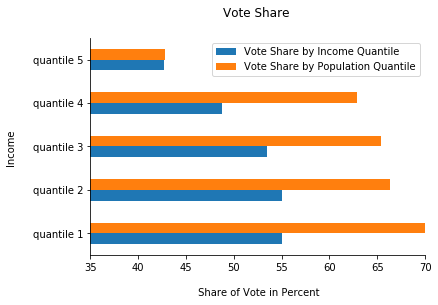

In [65]:
fig, ax = plt.subplots()

combo.plot(kind = "barh", ax = ax)

ax.set_xlim(35,70)
ax.set_ylabel("Income \n ")
ax.set_xlabel("\n Share of Vote in Percent")

ax.set_title("Vote Share \n")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()